### Sottoproblema 1: Prendere in input dei dati dall'utente e memorizzarli sottoforma di numeri

Concetti teorici correlati:
- variabili
- funzione input
- funzione print 
- tipi di dato
- operazioni con i dati

Qui andremo a prendere 6 input dall'utente e a trasformarli in variabili float

In [1]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))


In [2]:
print('punti vita',hp)
print('attacco',attack)
print('difesa',defense)
print('attacco speciale',sp_atk)
print('difesa speciale',sp_def)
print('velocità',speed)

punti vita 42.0
attacco 42.0
difesa 42.0
attacco speciale 42.0
difesa speciale 42.0
velocità 42.0


### Sottoproblema 2.a Leggere dal dataset tutti i dati relativi ai Pokemon

Concetti teorici correlati:
- liste e accesso ai loro elementi
- cicli for per scorrere le liste
- matrici
- file CSV e loro lettura
- apertura e lettura di un file in Python
- dataset
- introduzione alle f-strings (?)

Qui andremo ad aprire il dataset dei pokemon e ad assegnarlo ad una variabile

In [3]:
import csv

In [4]:
pokemon_rows=[]
with open('pokemon.csv','r') as file2:
  reader=csv.reader(file2)
  columns=next(reader)
  print(columns)
  for row in reader:
    pokemon_rows.append(row)
    


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [5]:
print(pokemon_rows[-1])

['721', 'Volcanion', 'Fire', 'Water', '600', '80', '110', '120', '130', '90', '70', '6', 'True']


Facciamo la stessa cosa utilizzando pandas, una libreria per la manipolazione e l'analisi dei dati che offre strutture dati e operazioni per manipolare tabelle numeriche e serie temporali.


In [6]:
import pandas as pd

In [7]:
df_pokemon=pd.read_csv('pokemon.csv')

In [8]:
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Sottoproblema 2.b Utilizzare una funzione per stabilire un grado di similarità

Concetti teorici correlati:
- espressioni matematiche più complesse e precedenza degli operatori
- modulo math
- funzioni
  - input/output di una funzione
  - argomenti

Qui andremo a creare e testare le funzioni per
- calcolo della distanza euclidea
- normalizzazione
Inoltre ci andremo a prendere le colonne con i soli valori numerici dal dataset

In [9]:
p1=(5,8)
p2=(7,6)

In [10]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=(px-qx)**2
  distance = distance**(1/2)
  return distance

print(euclidean_distance(p1,p2))

2.8284271247461903


usiamo la libreria math

In [11]:
import math

In [12]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=math.pow((px-qx),2)
  distance = math.sqrt(distance)
  return distance

print(euclidean_distance(p1,p2))

2.8284271247461903


  New in version 3.8

In [13]:
def euclidean_distance(p,q):
  return  math.dist(p,q)

print(euclidean_distance(p1,p2))

2.8284271247461903


In [14]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


Selezioniamo i valori di interesse e inseriamoli in una lista

In [15]:
indexs=[5,6,7,8,9,10]

In [16]:
def get_pokemon_values(row):
  pokemon_values=[]
  for index in indexs:
    pokemon_values.append(float(row[index]))
  return pokemon_values

In [17]:
print(get_pokemon_values(pokemon_rows[0]))

[45.0, 49.0, 49.0, 65.0, 65.0, 45.0]


In [18]:
pokemon_values=[]
for row in pokemon_rows:
  pokemon_values.append(get_pokemon_values(row))



In [19]:
pokemon_values[0]

[45.0, 49.0, 49.0, 65.0, 65.0, 45.0]

Creiamo una funzione per normalizzare

In [20]:
def normalizer(dataset):
  min_max=[]
  for column in range(len(dataset[0])):
    col_values=[ row[column] for row in dataset ]
    min_value=min(col_values)
    max_value=max(col_values)
    min_max.append((min_value,max_value))
  normalized_dataset=[]
  for row in dataset:
    normalized_row=[]
    for i,element in enumerate(row):
      normalized_element=(element-min_max[i][0])/(min_max[i][1]-min_max[i][0])
      normalized_row.append(normalized_element)
    normalized_dataset.append(normalized_row)
  return normalized_dataset
normalized_pokemon_rows=normalizer(pokemon_values)
print(normalized_pokemon_rows[0])


[0.1732283464566929, 0.23783783783783785, 0.19555555555555557, 0.29891304347826086, 0.21428571428571427, 0.22857142857142856]


Selezioniamo i valori di interesse con pandas

In [21]:
df_columns= ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [22]:
df_pokemon[ ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [23]:
df_pokemon[ df_columns].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [24]:
print(type(df_pokemon.iloc[0]))
print(df_pokemon.iloc[0])


<class 'pandas.core.series.Series'>
#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object


In [25]:
print(type(list(df_pokemon.iloc[0])))
print(list(df_pokemon.iloc[0]))

<class 'list'>
[1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, False]


selezioniamo i valori di interesse uno alla volta

In [26]:
def get_df_pokemon_values(row):
  pokemon_values=row[df_columns]
  return list(pokemon_values)

In [27]:
print(get_df_pokemon_values(df_pokemon.iloc[0]))

[45, 49, 49, 65, 65, 45]


selezioniamo i valori di interesse tutti insieme

In [28]:
df_pokemon_values=df_pokemon[df_columns]

In [29]:
df_pokemon_values.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [30]:
list_df_pokemon_values=df_pokemon_values.values.tolist()

In [31]:
list(list_df_pokemon_values)

[[45, 49, 49, 65, 65, 45],
 [60, 62, 63, 80, 80, 60],
 [80, 82, 83, 100, 100, 80],
 [80, 100, 123, 122, 120, 80],
 [39, 52, 43, 60, 50, 65],
 [58, 64, 58, 80, 65, 80],
 [78, 84, 78, 109, 85, 100],
 [78, 130, 111, 130, 85, 100],
 [78, 104, 78, 159, 115, 100],
 [44, 48, 65, 50, 64, 43],
 [59, 63, 80, 65, 80, 58],
 [79, 83, 100, 85, 105, 78],
 [79, 103, 120, 135, 115, 78],
 [45, 30, 35, 20, 20, 45],
 [50, 20, 55, 25, 25, 30],
 [60, 45, 50, 90, 80, 70],
 [40, 35, 30, 20, 20, 50],
 [45, 25, 50, 25, 25, 35],
 [65, 90, 40, 45, 80, 75],
 [65, 150, 40, 15, 80, 145],
 [40, 45, 40, 35, 35, 56],
 [63, 60, 55, 50, 50, 71],
 [83, 80, 75, 70, 70, 101],
 [83, 80, 80, 135, 80, 121],
 [30, 56, 35, 25, 35, 72],
 [55, 81, 60, 50, 70, 97],
 [40, 60, 30, 31, 31, 70],
 [65, 90, 65, 61, 61, 100],
 [35, 60, 44, 40, 54, 55],
 [60, 85, 69, 65, 79, 80],
 [35, 55, 40, 50, 50, 90],
 [60, 90, 55, 90, 80, 110],
 [50, 75, 85, 20, 30, 40],
 [75, 100, 110, 45, 55, 65],
 [55, 47, 52, 40, 40, 41],
 [70, 62, 67, 55, 55, 56

In [32]:
print(list_df_pokemon_values==pokemon_values)

True


Normalizziamo con pandas

In [34]:
df_pokemon.max()

C:\Users\danie\AppData\Local\Temp\ipykernel_22264\3899368093.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pokemon.max()


#                          721
Name          Zygarde50% Forme
Type 1                   Water
Total                      780
HP                         255
Attack                     190
Defense                    230
Sp. Atk                    194
Sp. Def                    230
Speed                      180
Generation                   6
Legendary                 True
dtype: object

In [35]:
def df_normalizer(df):
  normalized_df=(df-df.min())/(df.max()-df.min())
  return normalized_df
df_normalized=df_normalizer(df_pokemon[ df_columns])
print(df_normalized.head())

         HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0  0.173228  0.237838  0.195556  0.298913  0.214286  0.228571
1  0.232283  0.308108  0.257778  0.380435  0.285714  0.314286
2  0.311024  0.416216  0.346667  0.489130  0.380952  0.428571
3  0.311024  0.513514  0.524444  0.608696  0.476190  0.428571
4  0.149606  0.254054  0.168889  0.271739  0.142857  0.342857


### Sottoproblema 2.c Trovare i k pokemon più simili utilizzando la funzione di similarità

Concetti teorici correlati:
- cicli for
- strutture dati complesse (liste di tuple?)
- sort 
- funzioni lambda
- array slicing

Qui andremo ad unire i pezzi:
- Partiamo dall'input dell'utente e creiamo una lista corrispondente ad un pokemon "fittizio"
- Aggiungiamo al dataset e normalizziamo (ottenendo un dataset normalizzato)
- Estraiamo ultima riga (corrispondente al pokemon fittizio)
- in un ciclo for calcoliamo le distanze e le inseriamo nella struttura dati complessa
- orinamento tramite sort e lambda
- estraiamo i primi K elementi

In [36]:
def get_k_neighbors(dataset, element,k=5):
  complete_dataset=dataset+[element]
  normalized_dataset = normalizer(complete_dataset)
  normalized_element=normalized_dataset[-1]
  normalized_dataset=normalized_dataset[:-1]
  distances=[]
  for i,row in enumerate(normalized_dataset):
    distance=euclidean_distance(normalized_element,row)
    distances.append((i,distance))

  distances.sort(key=lambda x : x[1])

  return distances[:k]

In [37]:
hp=float(input('quale è il valore dei punti vita?\n'))
attack=float(input('quale è il valore di attacco?\n'))
defense=float(input('quale è il valore di difesa?\n'))
sp_atk=float(input("quale è il valore dell'attacco speciale?\n"))
sp_def=float(input("quale è il valore della difesa speciale?\n"))
speed=float(input("quale è il valore della velocità?\n"))



In [38]:
our_pokemon=[hp,attack,defense,sp_atk,sp_def,speed]
neighbors=get_k_neighbors(pokemon_values,our_pokemon)

In [39]:
print(neighbors)

[(143, 0.07332215672924264), (34, 0.07461084055276992), (324, 0.0779805020361919), (563, 0.08310581695328843), (255, 0.08554251618411642)]


usiamo pandas

In [40]:
def df_get_k_neighbors(dataset, element, k=5):
  df_pokemon_values=dataset[df_columns]
  pokemon_index=df_pokemon_values.index.max()+1
  pokemon=pd.Series(element,df_columns,name=pokemon_index)
  complete_dataset = pd.concat([df_pokemon_values, pd.DataFrame([pokemon,])])
  normalized_dataset = df_normalizer(complete_dataset)
  normalized_element = normalized_dataset.loc[pokemon_index]
  normalized_dataset = normalized_dataset[normalized_dataset.index!=pokemon_index]
  normalized_dataset['distance'] = normalized_dataset.apply(lambda row: euclidean_distance(row, normalized_element),axis=1)
  normalized_dataset.sort_values('distance',inplace=True)

  return normalized_dataset.head(k)[['distance']]




In [41]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))



In [42]:
our_pokemon = [hp, attack, defense, sp_atk, sp_def, speed]
df_neighbors = df_get_k_neighbors(df_pokemon, our_pokemon)
print(df_neighbors)

     distance
143  0.073322
34   0.074611
324  0.077981
563  0.083106
255  0.085543


### Sottoproblema 3 Visualizzare i risultati

Concetti teorici correlati:
- f-strings
- funzioni

In [43]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [44]:
def print_pokemon(index):
  s=f'{pokemon_rows[index][0]} - {pokemon_rows[index][1]}, di tipo {pokemon_rows[index][2]}'

  if pokemon_rows[index][-1]=='True':
    s+=f'\n - Pokemon Leggendario'
  else:
    s+=f'\n - Pokemon Non Leggendario'

  for column,value in zip(columns,pokemon_rows[index] ) :
    s+=f'\n{column:10} -> {value:5}'
  print(s)

In [45]:
for n in neighbors:
  print_pokemon(n[0])

132 - Ditto, di tipo Normal
 - Pokemon Non Leggendario
#          -> 132  
Name       -> Ditto
Type 1     -> Normal
Type 2     ->      
Total      -> 288  
HP         -> 48   
Attack     -> 48   
Defense    -> 48   
Sp. Atk    -> 48   
Sp. Def    -> 48   
Speed      -> 48   
Generation -> 1    
Legendary  -> False
29 - Nidoranâ™€, di tipo Poison
 - Pokemon Non Leggendario
#          -> 29   
Name       -> Nidoranâ™€
Type 1     -> Poison
Type 2     ->      
Total      -> 275  
HP         -> 55   
Attack     -> 47   
Defense    -> 52   
Sp. Atk    -> 40   
Sp. Def    -> 40   
Speed      -> 41   
Generation -> 1    
Legendary  -> False
300 - Skitty, di tipo Normal
 - Pokemon Non Leggendario
#          -> 300  
Name       -> Skitty
Type 1     -> Normal
Type 2     ->      
Total      -> 260  
HP         -> 50   
Attack     -> 45   
Defense    -> 45   
Sp. Atk    -> 35   
Sp. Def    -> 35   
Speed      -> 50   
Generation -> 3    
Legendary  -> False
504 - Patrat, di tipo Normal
 - Pokemon N

con pandas

In [46]:
def print_pokemon(index):
  s=f'{df_pokemon.loc[index,"#"]} - {df_pokemon.loc[index,"Name"]}, di tipo {df_pokemon.loc[index,"Type 1"]}'

  if df_pokemon.loc[index,"Legendary"]:
    s+=f'\n - Pokemon Leggendario'
  else:
    s+=f'\n - Pokemon Non Leggendario'

  for column in df_pokemon.columns :
    s+=f'\n{column:10} -> {df_pokemon.loc[index,column]:5}'
  print(s)

In [47]:
for n in df_neighbors.index:
  print_pokemon(n)

132 - Ditto, di tipo Normal
 - Pokemon Non Leggendario
#          ->   132
Name       -> Ditto
Type 1     -> Normal
Type 2     ->   nan
Total      ->   288
HP         ->    48
Attack     ->    48
Defense    ->    48
Sp. Atk    ->    48
Sp. Def    ->    48
Speed      ->    48
Generation ->     1
Legendary  ->     0
29 - Nidoran♀, di tipo Poison
 - Pokemon Non Leggendario
#          ->    29
Name       -> Nidoran♀
Type 1     -> Poison
Type 2     ->   nan
Total      ->   275
HP         ->    55
Attack     ->    47
Defense    ->    52
Sp. Atk    ->    40
Sp. Def    ->    40
Speed      ->    41
Generation ->     1
Legendary  ->     0
300 - Skitty, di tipo Normal
 - Pokemon Non Leggendario
#          ->   300
Name       -> Skitty
Type 1     -> Normal
Type 2     ->   nan
Total      ->   260
HP         ->    50
Attack     ->    45
Defense    ->    45
Sp. Atk    ->    35
Sp. Def    ->    35
Speed      ->    50
Generation ->     3
Legendary  ->     0
504 - Patrat, di tipo Normal
 - Pokemon Non L

### Visualizzare i Pokemon


In [48]:
from IPython.display import Image

--------------------------------------------------
1
Ditto


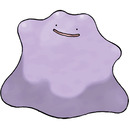

--------------------------------------------------
--------------------------------------------------
2
Nidoranâ™€


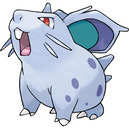

--------------------------------------------------
--------------------------------------------------
3
Skitty


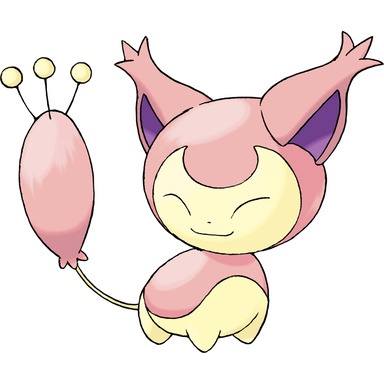

--------------------------------------------------
--------------------------------------------------
4
Patrat


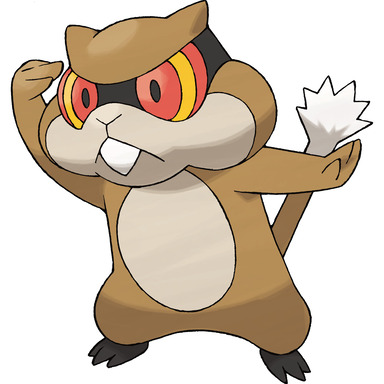

--------------------------------------------------
--------------------------------------------------
5
Tyrogue


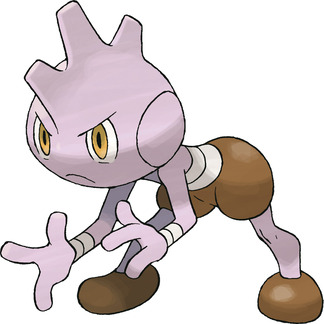

--------------------------------------------------


In [49]:
for n,p in enumerate(neighbors):
  index=p[0]
  print('-'*50)
  print(n+1)
  print(pokemon_rows[index][1])
  display(Image(f"resized/{pokemon_rows[index][0]}.jpg",width=150)),
  print('-'*50)

con pandas

--------------------------------------------------
1
Ditto


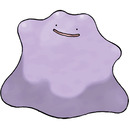

--------------------------------------------------
--------------------------------------------------
2
Nidoranâ™€


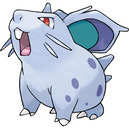

--------------------------------------------------
--------------------------------------------------
3
Skitty


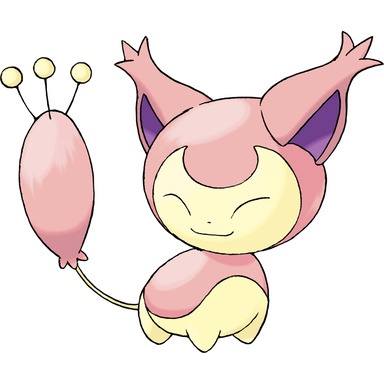

--------------------------------------------------
--------------------------------------------------
4
Patrat


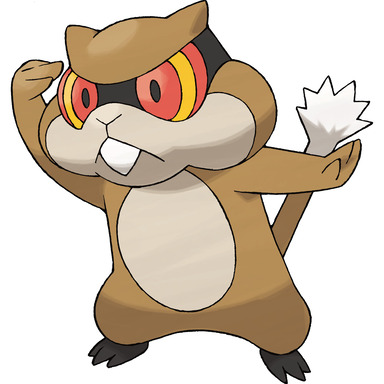

--------------------------------------------------
--------------------------------------------------
5
Tyrogue


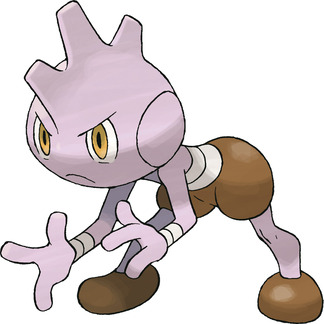

--------------------------------------------------


In [50]:


for n,p in enumerate(df_neighbors.index):
  index=p
  print('-'*50)
  print(n+1)
  print(pokemon_rows[index][1])
  display(Image(f"resized/{pokemon_rows[index][0]}.jpg",width=150)),
  print('-'*50)

In [50]:
print(type(risultato))

In [12]:
risultato=int(risultato)

In [13]:
print(type(risultato))

<class 'int'>


In [14]:
# Qui andremo a prendere 6 input dall'utente e a trasformarli in variabili float

In [15]:
hp=input('quale è il valore dei punti vita?\n')
attack=input('quale è il valore di attacco?\n')
defense=input('quale è il valore di difesa?\n')
sp_atk=input("quale è il valore dell'attacco speciale?\n")
sp_def=input("quale è il valore della difesa speciale?\n")
speed=input("quale è il valore della velocità?\n")


quale è il valore dei punti vita?
45
quale è il valore di attacco?
65
quale è il valore di difesa?
75
quale è il valore dell'attacco speciale?
45
quale è il valore della difesa speciale?
65
quale è il valore della velocità?
75


In [16]:
print('punti vita',hp)
print('attacco',attack)
print('difesa',defense)
print('attacco speciale',sp_atk)
print('difesa speciale',sp_def)
print('velocità',speed)

punti vita 45
attacco 65
difesa 75
attacco speciale 45
difesa speciale 65
velocità 75


### Sottoproblema 2.a Leggere dal dataset tutti i dati relativi ai Pokemon

Concetti teorici correlati:
- liste e accesso ai loro elementi
- cicli for per scorrere le liste
- matrici
- file CSV e loro lettura
- apertura e lettura di un file in Python
- dataset
- introduzione alle f-strings (?)

In [17]:
import os 
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/beginners')


Mounted at /content/drive


In [18]:
lista_interi=[1,2,3,4]
lista_stringhe=['a','s','ciao']
lista_mista=['a',3,6,3.14,'casa']


In [19]:
print(lista_interi)
lista_interi.append(9)
print(lista_interi)

[1, 2, 3, 4]
[1, 2, 3, 4, 9]


In [20]:
print(lista_interi[-2])

4


In [21]:
for element in lista_interi:
  print(element)

1
2
3
4
9


In [22]:
s=''
for element in lista_stringhe:
  s+=' '+ element
print(s)

 a s ciao


In [23]:
for i in range(len(lista_interi)):
  print(lista_interi[i])

1
2
3
4
9


In [24]:
for a in enumerate(lista_interi):
  print(a)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 9)


In [25]:
lista_1=['f',2,3,4,5]
lista_2=['a','b','c','d','e']
for numero ,lettera in zip(lista_1,lista_2):
  print(numero,lettera)

f a
2 b
3 c
4 d
5 e


In [26]:
matrice=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
for row in matrice:
  for element in row:
    print(element)
  print('fine riga')

1
2
3
fine riga
4
5
6
fine riga
7
8
9
fine riga
10
11
12
fine riga


In [27]:
tupla=(5)

In [28]:
# Qui andremo ad aprire il dataset dei pokemon e ad assegnarlo ad una variabile

In [29]:
import csv

In [30]:
file=open('pokemon.csv','r')
reader=csv.reader(file)
columns=next(reader)
print(columns)
for row in reader:
  print(row)
  break

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
['1', 'Bulbasaur', 'Grass', 'Poison', '318', '45', '49', '49', '65', '65', '45', '1', 'False']


In [31]:
file.close()

In [32]:
pokemon_rows=[]
with open('pokemon.csv','r') as file2:
  reader=csv.reader(file2)
  columns=next(reader)
  print(columns)
  for row in reader:
    pokemon_rows.append(row)
    


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [33]:
print(pokemon_rows[-1])

['721', 'Volcanion', 'Fire', 'Water', '600', '80', '110', '120', '130', '90', '70', '6', 'True']


### Sottoproblema 2.b Utilizzare una funzione per stabilire un grado di similarità

Concetti teorici correlati:
- espressioni matematiche più complesse e precedenza degli operatori
- modulo math
- funzioni
  - input/output di una funzione
  - argomenti

In [34]:
# Qui andremo a creare e testare le funzioni per
# - calcolo della distanza euclidea
# - normalizzazione
# Inoltre ci andremo a prendere le colonne con i soli valori numerici dal dataset

In [35]:
p1=(5,8)
p2=(5,6)

In [36]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=(px-qx)**2
  distance = distance**(1/2)
  return distance

print(euclidean_distance(p1,p2))

2.0


In [37]:
import math

In [38]:
def euclidean_distance(p,q):
  distance=0
  for px,qx in zip(p,q):
    distance+=math.pow((px-qx),2)
  distance = math.sqrt(distance)
  return distance

print(euclidean_distance(p1,p2))

2.0


In [39]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [40]:
indexs=[5,6,7,8,9,10]

In [41]:
def get_pokemon_values(row):
  pokemon_values=[]
  for index in indexs:
    pokemon_values.append(float(row[index]))
  return pokemon_values

In [42]:
print(get_pokemon_values(pokemon_rows[-1]))

[80.0, 110.0, 120.0, 130.0, 90.0, 70.0]


In [43]:
pokemon_values=[]
for row in pokemon_rows:
  pokemon_values.append(get_pokemon_values(row))



In [44]:
pokemon_values[-1]

[80.0, 110.0, 120.0, 130.0, 90.0, 70.0]

### Sottoproblema 2.c Trovare i k pokemon più simili utilizzando la funzione di similarità

Concetti teorici correlati:
- cicli for
- strutture dati complesse (liste di tuple?)
- sort 
- funzioni lambda
- array slicing

In [45]:
# Qui andremo ad unire i pezzi:
# - Partiamo dall'input dell'utente e creiamo una lista corrispondente ad un pokemon "fittizio"
# - Aggiungiamo al dataset e normalizziamo (ottenendo un dataset normalizzato)
# - Estraiamo ultima riga (corrispondente al pokemon fittizio)
# - in un ciclo for calcoliamo le distanze e le inseriamo nella struttura dati complessa
# - orinamento tramite sort e lambda
# - estraiamo i primi K elementi

In [46]:
def get_k_neighbors(dataset,element,k=5):
  distances=[]
  for index,row in enumerate(dataset):
    distance=euclidean_distance(row,element)
    distances.append((index,distance))

  distances.sort(key=lambda x:x[1])
  return distances[:k]

In [47]:
hp=float(input('quale è il valore dei punti vita?\n'))
attack=float(input('quale è il valore di attacco?\n'))
defense=float(input('quale è il valore di difesa?\n'))
sp_atk=float(input("quale è il valore dell'attacco speciale?\n"))
sp_def=float(input("quale è il valore della difesa speciale?\n"))
speed=float(input("quale è il valore della velocità?\n"))

our_pokemon=[hp,attack,defense,sp_atk,sp_def,speed]
neighbors=get_k_neighbors(pokemon_values,our_pokemon)

quale è il valore dei punti vita?
45
quale è il valore di attacco?
65
quale è il valore di difesa?
78
quale è il valore dell'attacco speciale?
68
quale è il valore della difesa speciale?
65
quale è il valore della velocità?
75


In [48]:
print(neighbors)

[(335, 21.166010488516726), (555, 22.06807649071391), (644, 26.551836094703507), (167, 26.70205984563738), (10, 26.962937525425527)]


### Sottoproblema 3 Visualizzare i risultati

Concetti teorici correlati:
- f-strings
- funzioni

In [49]:
# Qui andremo a creare una funzione che partendo dai K indici ci costruisce K stringhe tramite funzione ed f-strings

In [50]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [51]:
def print_pokemon(index):
  s=f'{pokemon_rows[index][0]} - {pokemon_rows[index][1]}, di tipo {pokemon_rows[index][2]}'

  if pokemon_rows[index][-1]=='True':
    s+=f'\n - Pokemon Leggendario'
  else:
    s+=f'\n - Pokemon Non Leggendario'

  for column,value in zip(columns,pokemon_rows[index] ) :
    s+=f'\n{column:10} -> {value:5}'
  print(s)

In [52]:
for n in neighbors:
  print_pokemon(n[0])

308 - Medicham, di tipo Fighting
 - Pokemon Non Leggendario
#          -> 308  
Name       -> Medicham
Type 1     -> Fighting
Type 2     -> Psychic
Total      -> 410  
HP         -> 60   
Attack     -> 60   
Defense    -> 75   
Sp. Atk    -> 60   
Sp. Def    -> 75   
Speed      -> 80   
Generation -> 3    
Legendary  -> False
496 - Servine, di tipo Grass
 - Pokemon Non Leggendario
#          -> 496  
Name       -> Servine
Type 1     -> Grass
Type 2     ->      
Total      -> 413  
HP         -> 60   
Attack     -> 60   
Defense    -> 75   
Sp. Atk    -> 60   
Sp. Def    -> 75   
Speed      -> 83   
Generation -> 5    
Legendary  -> False
583 - Vanillish, di tipo Ice
 - Pokemon Non Leggendario
#          -> 583  
Name       -> Vanillish
Type 1     -> Ice  
Type 2     ->      
Total      -> 395  
HP         -> 51   
Attack     -> 65   
Defense    -> 65   
Sp. Atk    -> 80   
Sp. Def    -> 75   
Speed      -> 59   
Generation -> 5    
Legendary  -> False
153 - Bayleef, di tipo Grass
 - Po

### Bonus track Visualizzare i Pokemon

Concetti di teoria correlati:
- `list comprehension`

Se sei sul tuo Jupyter notebook usa il seguente snippet di codice: 

```python
from IPython.display import Image

for n,p in enumerate(best_pokemon):
    print('-'*50)
    print(n+1)
    print(pokemon_dataset[p[0]][1])
    display(Image(f"resized/{pokemon_dataset[p[0]][0]}.jpg")),
    print('-'*50)
```

--------------------------------------------------
1
Medicham


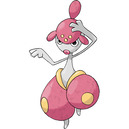

--------------------------------------------------
--------------------------------------------------
2
Servine


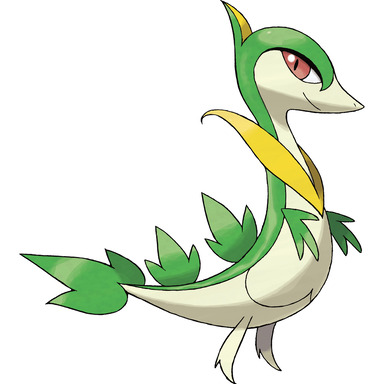

--------------------------------------------------
--------------------------------------------------
3
Vanillish


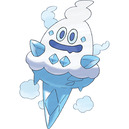

--------------------------------------------------
--------------------------------------------------
4
Bayleef


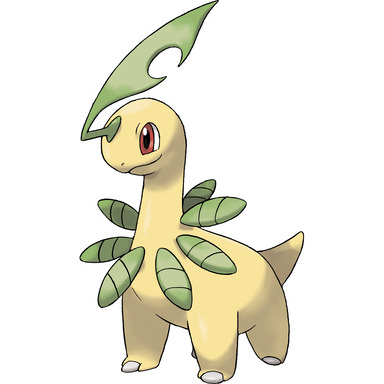

--------------------------------------------------
--------------------------------------------------
5
Wartortle


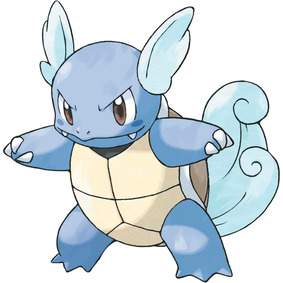

--------------------------------------------------


In [53]:
from IPython.display import Image

for n,p in enumerate(neighbors):
  index=p[0]
  print('-'*50)
  print(n+1)
  print(pokemon_rows[index][1])
  display(Image(f"resized/{pokemon_rows[index][0]}.jpg",width=150)),
  print('-'*50)